## Mesh generator

Subroutine to save the mesh

* Represent the mesh in terms of openmesh classes. 
* Generate the handles of the mesh. 
* The vertex handles are used to generate the face handles. Store the mesh in an ".off" file.

In [24]:
# save the mesh
#
import sys
def save_mesh(P, T, filename):
    mesh = om.TriMesh()
    
    filename2 = filename[0:-4]+'_2.off'
    
    print('WARNING: All prints are printed into a file.')
    sys.stdout = open(filename2, 'w')
    print('OFF')
    print(len(P), len(T.simplices), 0)
    
    k=0
    vh=[]
    for p in P:
        k=k+1; 
        print('%.2f' % p[0] ,'%.2f' % p[1], 0)    
        vh.append(mesh.add_vertex([p[0], p[1], 0]))
    
    k=0
    for t in T.simplices:
        k=k+1
        print(3,' ',t[0], t[1], t[2])
        mesh.add_face(vh[t[0]],vh[t[1]],vh[t[2]])

    om.write_mesh(filename, mesh)

Generate a Delaunay triangulation of a set of points.

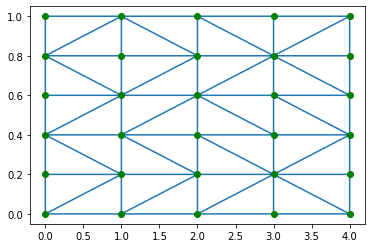

In [25]:
import openmesh as om
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

X = np.arange(0,5,1)
Y = np.arange(0,1.05,0.2)

# X = np.arange(0,5,0.1)
# Y = np.arange(0,1.05,0.02)

P = np.array([[x,y] for y in Y for x in X])
T = Delaunay(P)
plt.triplot(P[:,0],P[:,1],T.simplices)
plt.plot(P[:,0],P[:,1],'go')

save_mesh(P, T, 'dmz.off')

## Extended mesh
In order to get smaller angles we add the barycenter points as additional points to the mesh.


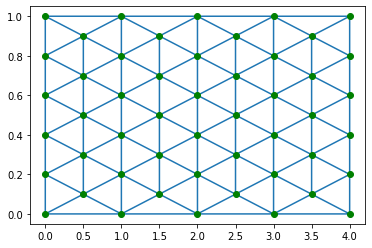

In [26]:
Xbar = np.arange(0.5,4,1)
Ybar = np.arange(0.1,1.0,0.2)
Pbar = np.array([[x,y] for y in Ybar for x in Xbar])
PP = np.vstack([P,Pbar])
T = Delaunay(PP)
plt.triplot(PP[:,0], PP[:,1],T.simplices)
plt.plot(PP[:,0], PP[:,1],'go')

# save_mesh(PP, T, 'T4.off')


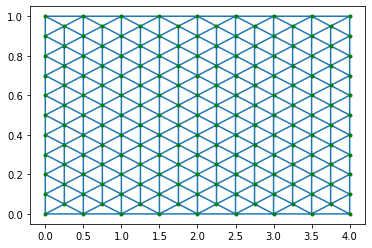

In [37]:
SCALE=2
X = np.arange(0,4 + 1/SCALE,1/SCALE)
Y = np.arange(0, 1 + 0.05/SCALE, 0.2/SCALE)

Xbar = np.arange(0.5/SCALE,4,1/SCALE)
Ybar = np.arange(0.1/SCALE,1.0,0.2/SCALE)

P = np.array([[x,y] for y in Y for x in X])
Pbar = np.array([[x,y] for y in Ybar for x in Xbar])

PP = np.vstack([P,Pbar])
T = Delaunay(PP)
plt.triplot(PP[:,0], PP[:,1],T.simplices)
plt.plot(PP[:,0], PP[:,1], 'g.')

# save_mesh(PP, T, 'T8.off')

